# Modeling Notebook

In this notebook I explore the different baseline models. I decided to use the most common classification models, using Accuracy score as the scoring metric. Since we want to make sure that each model predicts with the best accuracy to prevent any loss of attention or revenue on customers that are not recurrent churners or are possible to churn.


adaboost
xgboost
naive bayse 

In [332]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import neighbors
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

pd.set_option('display.max_columns', 1000)

In [333]:
df=pd.read_csv("modeling_customer_df.csv",index_col="Unnamed: 0")

In [334]:
df

latitude   longitude  senior_citizen  partner  dependents  \
0     33.964131 -118.272783             0.0      0.0         0.0   
1     34.059281 -118.307420             0.0      0.0         1.0   
2     34.048013 -118.293953             0.0      0.0         1.0   
3     34.062125 -118.315709             0.0      1.0         1.0   
4     34.039224 -118.266293             0.0      0.0         1.0   
...         ...         ...             ...      ...         ...   
7038  34.341737 -116.539416             0.0      0.0         0.0   
7039  34.667815 -117.536183             0.0      1.0         1.0   
7040  34.559882 -115.637164             0.0      1.0         1.0   
7041  34.167800 -116.864330             0.0      1.0         1.0   
7042  34.424926 -117.184503             0.0      0.0         0.0   

      tenure_months  phone_service  device_protection  tech_support  \
0               2.0            1.0                0.0           0.0   
1               2.0            1.0                0.0           0.0   
2               8.0            1.0                1.0           0.0   
3              28.0            1.0                1.0           1.0   
4              49.0            1.0                1.0           0.0   
...             ...            ...                ...           ...   
7038           72.0            1.0                0.0           0.0   
7039           24.0            1.0                1.0           1.0   
7040           72.0            1.0                1.0           0.0   
7041           11.0            0.0                0.0           0.0   
7042           66.0            1.0                1.0           1.0   

      paperless_billing  monthly_charges  churn_value    cltv  \
0                   1.0            53.85          1.0  3239.0   
1                   1.0            70.70          1.0  2701.0   
2                   1.0            99.65          1.0  5372.0   
3                   1.0           104.80          1.0  5003.0   
4                   1.0           103.70          1.0  5340.0   
...                 ...              ...          ...     ...   
7038                1.0            21.15          0.0  5306.0   
7039                1.0            84.80          0.0  2140.0   
7040                1.0           103.20          0.0  5560.0   
7041                1.0            29.60          0.0  2793.0   
7042                1.0           105.65          0.0  5097.0   

      satisfaction_score  referred_a_friend  number_of_referrals  \
0                    1.0                0.0                  0.0   
1                    2.0                0.0                  0.0   
2                    3.0                0.0                  0.0   
3                    3.0                0.0                  0.0   
4                    1.0                0.0                  0.0   
...                  ...                ...                  ...   
7038                 5.0                0.0                  0.0   
7039                 3.0                1.0                  1.0   
7040                 4.0                1.0                  4.0   
7041                 4.0                1.0                  1.0   
7042                 4.0                0.0                  0.0   

      tenure_in_months  avg_monthly_long_distance_charges  \
0                  2.0                              10.47   
1                  2.0                               9.12   
2                  8.0                              12.15   
3                 28.0                               4.89   
4                 49.0                              44.33   
...                ...                                ...   
7038              72.0                              22.77   
7039              24.0                              36.05   
7040              72.0                              29.66   
7041              11.0                               0.00   
7042              66.0                              30.96   

      

In [335]:
y=df["churn_value"]
X=df[df.columns[df.columns!="churn_value"]]

In [336]:
X_test,X_train,y_test,y_train=train_test_split(X,y, test_size=.02, random_state=2020)

# Vanilla Models

Creating different models as baseline. I want to decide on a model that is able to handle the data more accurately and that I can focus on fine tunning. 

### Logistic Regression

In [337]:
log_reg=LogisticRegression(max_iter=10000, random_state=40)

In [338]:
log_reg.fit(X_train,y_train)

log_pred=log_reg.predict(X_test)

In [339]:
log_acc=metrics.recall_score(y_test, log_pred)
log_rec=metrics.accuracy_score(y_test, log_pred)
log_f1=metrics.f1_score(y_test,log_pred)

In [340]:
print('Logistic Regression Accuracy: {}'.format(log_acc))
print('Logistic Regression Recall: {}'.format(log_rec))
print('Logistic Regression F1: {}'.format(log_f1))

Logistic Regression Accuracy: 0.9265106151333696
Logistic Regression Recall: 0.9789915966386554
Logistic Regression F1: 0.9591434206818822


### KNN

In [341]:
knn=KNeighborsClassifier()

In [342]:
knn.fit(X_train,y_train)

knn_pred=knn.predict(X_test)

In [343]:
knn_acc=metrics.recall_score(y_test, knn_pred)
knn_rec=metrics.accuracy_score(y_test, knn_pred)
knn_f1=metrics.f1_score(y_test,knn_pred)

In [344]:
print('KNN accuracy: {}'.format(knn_acc))
print('KNN Recall: {}'.format(knn_rec))
print('KNN F1: {}'.format(knn_f1))

KNN accuracy: 0.18181818181818182
KNN Recall: 0.7274702984642133
KNN F1: 0.2620635543350333


### Random Forest

In [345]:
RF=RandomForestClassifier(max_depth=20,verbose=True, random_state=40)

In [346]:
RF.fit(X_train,y_train)

rf_pred=RF.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [347]:
rf_acc=metrics.recall_score(y_test, rf_pred)
rf_rec=metrics.accuracy_score(y_test, rf_pred)
rf_f1=metrics.f1_score(y_test,rf_pred)

In [348]:
print('Random Forest Accuracy: {}'.format(rf_acc))
print('Random Forest Recall: {}'.format(rf_rec))
print('Random Forest F1: {}'.format(rf_f1))

Random Forest Accuracy: 0.9569951007076756
Random Forest Recall: 0.9885540423065778
Random Forest F1: 0.9780250347705146


### Scores

In [349]:
results={"Name":["Logistic Regression","KNN","Random Forest"],"Accuracy":[log_acc,knn_acc,rf_acc],"Recall":[log_rec,knn_rec,rf_rec],"F1":[log_f1,knn_f1,rf_f1]}
score=pd.DataFrame.from_dict(results)
score

,Name,Accuracy,Recall,F1
0,Logistic Regression,0.926511,0.978992,0.959143
1,KNN,0.181818,0.727470,0.262064
2,Random Forest,0.956995,0.988554,0.978025


After reviewing all baseline models, it is a very close call between Logistic Regression and Random forest. Random forest provides the best score overall but maybe there is room for improvement in both. I will further explore PCA and GridSearch to better thee models. 

# PCA

Using PCA to help improve the Logistic Regression Model. By generating the principal components and having it reduced to 2 N Components could improve the modeling process.

### Using PCA for bettering the model.

In [350]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [374]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)


X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [375]:
log_reg_pca=LogisticRegression(max_iter=1000, random_state=40)
log_reg_pca.fit(X_train_pca,y_train)

log_pred_pca=log_reg_pca.predict(X_test_pca)

In [376]:
log_acc_pca=metrics.recall_score(y_test, log_pred_pca)
log_rec_pca=metrics.accuracy_score(y_test, log_pred_pca)
log_f1_pca=metrics.f1_score(y_test,log_pred_pca)

In [377]:
print('Logistic Regression Accuracy: {}'.format(log_acc_pca))
print('Logistic Regression Recall: {}'.format(log_rec_pca))
print('Logistic Regression F1: {}'.format(log_f1_pca))

Logistic Regression Accuracy: 0.8415895481763745
Logistic Regression Recall: 0.9575485366560418
Logistic Regression F1: 0.9134416543574594


In [355]:
score=score.append({'Name': "Random Forest PCA", "Accuracy": RF_acc_pca, "Recall": RF_rec_pca,"F1":RF_f1_pca}, ignore_index=True)
score

,Name,Accuracy,Recall,F1
0,Logistic Regression,0.926511,0.978992,0.959143
1,KNN,0.181818,0.727470,0.262064
2,Random Forest,0.956995,0.988554,0.978025
3,Random Forest PCA,0.850299,0.959722,0.918283


### Grid Search for Logistic Regression

In [278]:
params={
    "penalty":["l1","l2"],
    "class_weight":["balanced","None"],
    "max_iter":range(100,5000,100),
    "warm_start":["True","False"]   
}

In [282]:
log_reg=LogisticRegression(random_state=40)
grid_lg=GridSearchCV(log_reg, params, cv=20, scoring="f1", verbose=1, n_jobs=-1)

In [283]:
grid_lg.fit(X_train,y_train)

Fitting 20 folds for each of 392 candidates, totalling 7840 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 342 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done 802 tasks      | elapsed:   57.4s
[Parallel(n_jobs=-1)]: Done 1216 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1746 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 2440 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 3260 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done 4368 tasks      | elapsed: 16.8min
[Parallel(n_jobs=-1)]: Done 5500 tasks      | elapsed: 19.9min
[Parallel(n_jobs=-1)]: Done 6632 tasks      | elapsed: 25.8min
[Parallel(n_jobs=-1)]: Done 7840 out of 7840 | elapsed: 33.3min finished
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Incr

GridSearchCV(cv=20, estimator=LogisticRegression(random_state=40), n_jobs=-1,
             param_grid={'class_weight': ['balanced', 'None'],
                         'max_iter': range(100, 5000, 100),
                         'penalty': ['l1', 'l2'],
                         'warm_start': ['True', 'False']},
             scoring='f1', verbose=1)

In [284]:
print("Best Gridsearch Score: {}".format(grid_lg.best_score_))
print("Best Parameters: {}".format(grid_lg.best_params_))
print("Best Estimators: {}".format(grid_lg.best_estimator_))

Best Gridsearch Score: 0.9833333333333332
Best Parameters: {'class_weight': 'balanced', 'max_iter': 2600, 'penalty': 'l2', 'warm_start': 'True'}
Best Estimators: LogisticRegression(class_weight='balanced', max_iter=2600, random_state=40,
                   warm_start='True')


In [285]:
gs_pred=grid_lg.best_estimator_.predict(X_test)

In [286]:
gs_acc=metrics.recall_score(y_test, gs_pred)
gs_rec=metrics.accuracy_score(y_test, gs_pred)
gs_f1=metrics.f1_score(y_test,gs_pred)

In [287]:
print('GridSearch Logistic Regression Accuracy: {}'.format(gs_acc))
print('GridSearch Logistic Regression Recall: {}'.format(gs_rec))
print('GridSearch Logistic Regression F1: {}'.format(gs_f1))

GridSearch Logistic Regression Accuracy: 0.9553620032661949
GridSearch Logistic Regression Recall: 0.984352361634309
GridSearch Logistic Regression F1: 0.9701492537313433


In [288]:
score=score.append({'Name': "GridSearch LR", "Accuracy": gs_acc, "Recall": gs_rec,"F1":gs_f1}, ignore_index=True)
score

,Name,Accuracy,Recall,F1
0,Logistic Regression,0.926511,0.978992,0.959143
1,KNN,0.181818,0.727470,0.262064
2,Random Forest,0.956995,0.988554,0.978025
3,Random Forest PCA,0.867719,0.964358,0.928363
4,GridSearch LR,0.955362,0.984352,0.970149


After getting the best parameters it is clear that this model is in the right track. With a slight improvement from the original Logistic regression model some more fine tunning could improve the recall and accuracy score. 

### Second Iteration Gridsearch

In [27]:
params2={
    "max_iter":range(2000,3000,10),
  
}

In [28]:
logreg2=LogisticRegression(class_weight="balanced",penalty="l2",warm_start=True)
grid_lg2=GridSearchCV(logreg2, params2, cv=20, scoring="f1", verbose=1, n_jobs=-1)

In [29]:
grid_lg2.fit(X_train,y_train)

Fitting 20 folds for each of 100 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   20.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 18.0min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed: 20.6min finished
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

GridSearchCV(cv=20,
             estimator=LogisticRegression(class_weight='balanced',
                                          warm_start=True),
             n_jobs=-1, param_grid={'max_iter': range(2000, 3000, 10)},
             scoring='f1', verbose=1)

In [30]:
print("Best Gridsearch Score: {}".format(grid_lg2.best_score_))
print("Best Parameters: {}".format(grid_lg2.best_params_))
print("Best Estimators: {}".format(grid_lg2.best_estimator_))

Best Gridsearch Score: 0.8649999999999999
Best Parameters: {'max_iter': 2640}
Best Estimators: LogisticRegression(class_weight='balanced', max_iter=2640, warm_start=True)


In [31]:
gs_pred2=grid_lg2.best_estimator_.predict(X_test)

In [32]:
gs_acc2=metrics.recall_score(y_test, gs_pred2)
gs_rec2=metrics.accuracy_score(y_test, gs_pred2)
gs_f12=metrics.f1_score(y_test,gs_pred2)

In [33]:
print('GridSearch Logistic Regression Accuracy: {}'.format(gs_acc2))
print('GridSearch Logistic Regression Recall: {}'.format(gs_rec2))
print('GridSearch Logistic Regression F1: {}'.format(gs_f12))

GridSearch Logistic Regression Accuracy: 0.8769733260751225
GridSearch Logistic Regression Recall: 0.9424804404520429
GridSearch Logistic Regression F1: 0.8903011881735288


In [34]:
score=score.append({'Name': "Second GridSearch LR", "Accuracy": gs_acc2, "Recall": gs_rec2,"F1":gs_f12}, ignore_index=True)
score

,Name,Accuracy,Recall,F1
0,Logistic Regression,0.806206,0.939293,0.876072
1,KNN,0.181818,0.727470,0.262064
2,Random Forest,0.490474,0.861779,0.653846
3,GridSearch LR,0.875885,0.941756,0.888950
4,Second GridSearch LR,0.876973,0.942480,0.890301


# PCA

In [148]:
df2=df.copy()
y2=df2["churn_value"]
X2=df2[df.columns[df.columns!="churn_value"]]

In [149]:
x = StandardScaler().fit_transform(X2)

In [150]:
from sklearn.decomposition import PCA

pca = PCA(n_components=.9)
components=pca.fit_transform(x)


In [151]:
eig_values = pca.explained_variance_
pc1 = pca.components_[0]

structure_loading_1 = pc1* np.sqrt(eig_values[0])
str_loading_1 = pd.Series(structure_loading_1, index=list(X_train.columns))
str_loading_1.sort_values(ascending=False).head(20)

total_charge                   0.917081
total_revenue                  0.902721
tenure_in_months               0.800037
tenure_months                  0.799764
monthly_charges                0.660971
device_protection              0.613520
device_protection_plan         0.613520
total_long_distance_charges    0.596628
streaming_movies_srvc          0.568347
premium_tech_support           0.546559
tech_support                   0.546559
streaming_tv_srvc              0.542089
online_backup_srvc             0.535679
streaming_music                0.508384
online_security                0.479400
internet_services              0.459654
customer_status_Stayed         0.457552
multiple_line                  0.436022
partner                        0.416901
referred_a_friend              0.408014
dtype: float64

In [152]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [153]:
finalDf = pd.concat([principalDf, y2], axis = 1)

In [158]:
finalDf

,principal component 1,principal component 2,churn_value
0,-3.675278,3.020499,1.0
1,-3.512533,3.443846,1.0
2,-1.049612,3.536703,1.0
3,1.398909,4.176970,1.0
4,2.129676,3.757299,1.0
...,...,...,...
7038,-1.005431,-4.019009,0.0
7039,2.554772,-0.729960,0.0
7040,5.875356,-0.451705,0.0
7041,-2.429502,-1.373917,0.0


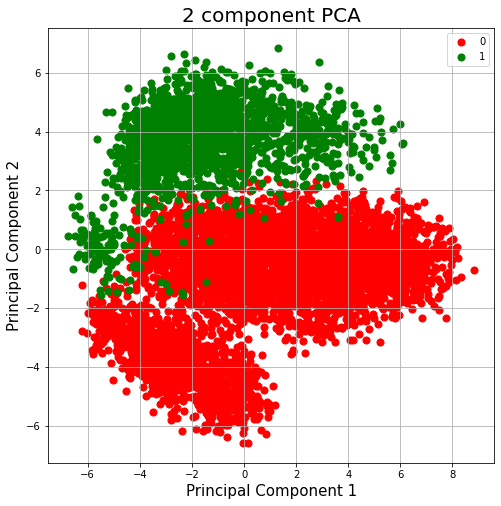

In [164]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0,1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['churn_value'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()